# Aula 29: Regressão e método do gradiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Gradiente com uma variável real

Função

$$f(x) = 2x^4 + x^3 - 3x^2$$

Derivada primeira:

$$f'(x) = 8x^3 + 3x^2 - 6x$$

In [2]:
def f(x):
    return 2*x**4 + x**3 - 3*x**2

def fp(x):
    return 8*x**3 + 3*x**2 - 6*x

In [3]:
def plotffp(x=None, eta=0):
    X = np.linspace(-2, 2, 300)
    y = f(X)
    y2 = fp(X)

    plt.figure(figsize=(10,6))
    plt.plot(X, y, label='f(x)')
    plt.plot(X, y2, label="f'(x)")
    plt.ylim(-5,5)

    if x is not None:
        fx = f(x)
        fpx = fp(x)
        nx = x - eta*fpx
        
        plt.scatter(x, f(x), c='k')
        plt.scatter(nx, f(nx), c=[[1,0,0]])
        
        print(f"f(x) = {fx:.4f}")
        print(f"f'(x) = {fpx:.4f}")
        print(f"x - η·f'(x) = {nx:.4f}")
    else:
        nx = x
    
    plt.legend(prop=dict(size=16));
    
    return nx

Gráficos das funções

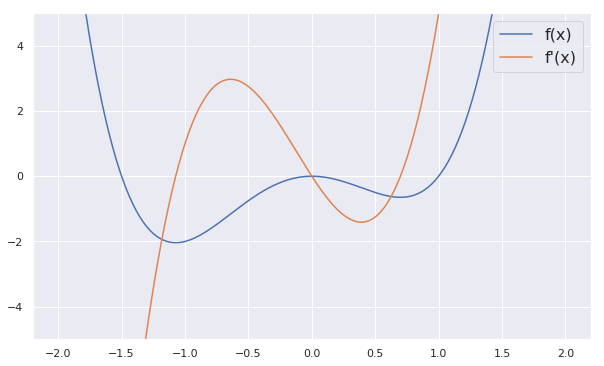

In [4]:
plotffp()

In [5]:
f(-1.5), fp(-1.5)

(0.0, -11.25)

Vamos definir $\eta=0{,}01$ e um ponto inicial $x=-1{,}5$.

In [6]:
eta = 0.01
x = -1.5

E agora vamos percorrer no sentindo contrário ao gradiente. Excute a célula abaixo várias vezes.

f(x) = 0.0000
f'(x) = -11.2500
x - η·f'(x) = -1.3875


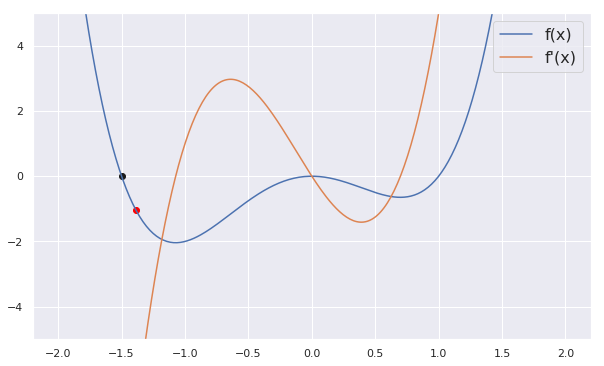

In [7]:
x = plotffp(x, eta)

Seguindo a derivada com $\eta=0{,}1$. Execute a célula do gráfico várias vezes.

In [8]:
gamma = 0.1
x = -1.5

f(x) = 0.0000
f'(x) = -11.2500
x - η·f'(x) = -1.3875


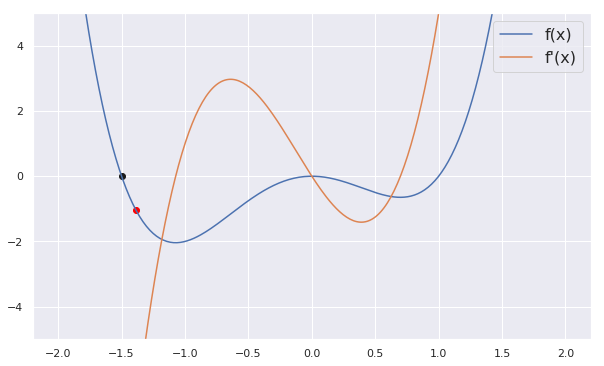

In [9]:
x = plotffp(x, eta)

Seguindo a derivada com $\eta=0{,}2$. Execute a célula do gráfico várias vezes.

In [10]:
eta = 0.2
x = -1.5

f(x) = 0.0000
f'(x) = -11.2500
x - η·f'(x) = 0.7500


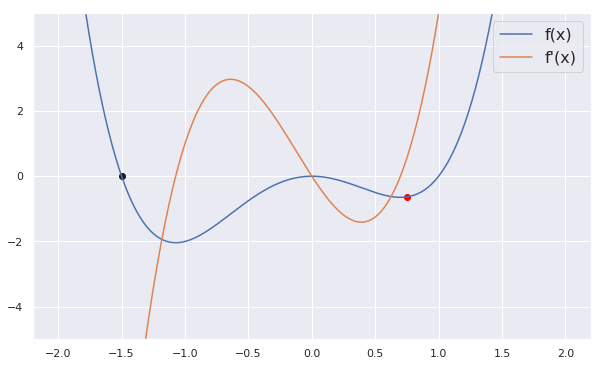

In [11]:
x = plotffp(x, eta)

Note que, com $\eta$ muito elevado, não conseguimos chegar próximo do mínimo local. Nossa variável de teste fica "saltando" de um lado para o outro do mínimo.

Se escolhêssemos $\eta$ ainda mais elevado, o deslocamento $\eta\cdot{}f'(x)$ seria tão elevado que o ponto de teste ficaria fora da janela selecionada para o gráfico.

# Gradiente para duas variáveis

Função:

$$f(x, y) = \sin(\frac{1}{2}x^2 + y^2 + 3)+\cos(x - \frac{1}{2}y)$$

Derivada parcial ($x$):

$$\frac{\partial{}f}{\partial{}x} = x\cos(\frac{1}{2}x^2 + y^2 + 3) - \sin(x - \frac{1}{2}y)$$

Derivada parcial ($y$):

$$\frac{\partial{}f}{\partial{}y} = 2y\cos(\frac{1}{2}x^2 + y^2 + 3) + \frac{1}{2}\sin(x - \frac{1}{2}y)$$

In [12]:
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def f2(x, y):
    z = np.sin(x**2/2+y**2+3) + np.cos(x - y/2)
    return z
    
def fp2(x, y):
    cc = np.cos(x**2/2+y**2+3)
    ss = np.sin(x - y/2)
    
    fx = x*cc - ss
    fy = 2*y*cc + ss/2
    
    return [fx, fy]

def plotgrid(superficieX, superficieY, superficieZ, x=None, y=None, eta=0):
    plt.figure(figsize=(8,8))
    ax = plt.gca()
    plt.contour(superficieX, superficieY, superficieZ, levels=30, cmap='hot');

    if x is not None:
        # Calcula o deslocamento
        [fx, fy] = fp2(x, y)
        nx = x - eta*fx
        ny = y - eta*fy
        print(f"({x:.2f},{y:.2f}) - η({fx:.2f}, {fy:.2f}) = ({nx:.2f}, {ny:.2f})")
        
        # Encontra um vetor unitário no sentido oposto ao gradiente
        norma = fx*fx + fy*fy
        gx = fx / np.sqrt(norma)
        gy = fy / np.sqrt(norma)
        
        plt.scatter(x, y)
        draw_vector([x,y], [x-.5*gx, y-.5*gy], ax)
    else:
        nx = x
        ny = y
        
    return [nx, ny]

Vamos gerar um grid com $X$ e $Y$ no intervalo $[-2{,}5; +2{,}5]$ e calcular a função $f(x,y)$ para $100\times100$ pontos desse grid.

In [13]:
r = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(r, r)
Z = f2(X, Y)

Observando o grid:

[None, None]

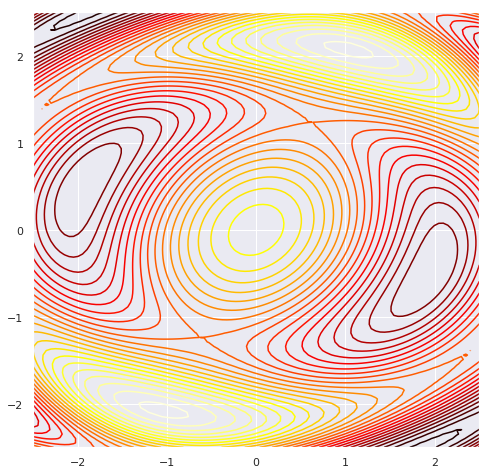

In [14]:
plotgrid(X, Y, Z)

Agora vamos ver aonde o método do gradiente descendente nos leva, partindo do ponto $(0, -0{,}5)$ e caminhando com $\eta=0{,}2$.

In [15]:
eta = 0.2
x = 0
y = -.5

(0.00,-0.50) - η(-0.25, 1.12) = (0.05, -0.72)


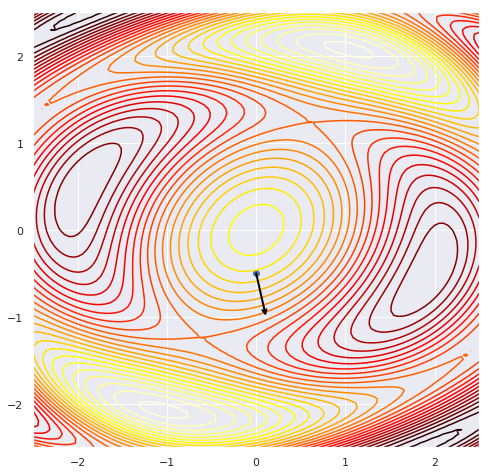

In [16]:
[x,y] = plotgrid(X, Y, Z, x, y, eta)

# Regressão linear com gradiente descendente

Gere um conjunto de pontos

In [17]:
def gerar_pontos(x=range(1,11), semente=42):
    r = np.random.RandomState(semente)
    x = np.array(x, dtype=np.float)
    real = np.sin(2*x / (np.pi)) 
    y = real + r.randn(len(x))/4
    return (y, real)

In [18]:
x = np.linspace(0, 10, 30)
y, real = gerar_pontos(x, 42)

Função real e pontos gerados com ruído

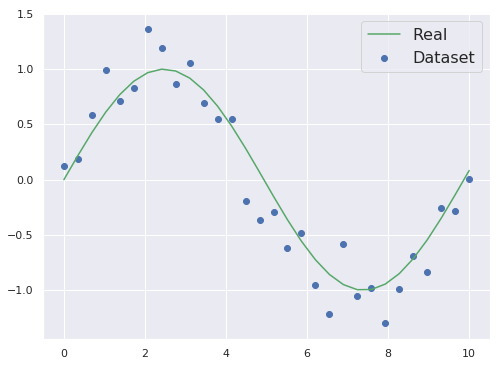

In [19]:
plt.figure(figsize=(8,6));
plt.scatter(x, y, label='Dataset');
plt.plot(x, real, c='g', label='Real');
plt.legend(prop=dict(size=16));

Primeiramente, vamos gerar a matriz de variáveis aumentada $\pmatrix{\mathbf{1} & \mathbf{\mathsf{x}} & \mathbf{\mathsf{x}}^2 & \mathbf{\mathsf{x}}^3}$.

Essa matriz será utilizada para a combinação linear dos quatro pesos com a variável $x$ de entrada no nosso modelo, isto é:

$$\hat{y}(x, \mathbf{\mathsf{w}}) = w_0 + w_1x + w_2x^2 + w_3x^3$$

In [20]:
X = np.array([np.ones_like(x), x, x**2, x**3]).T
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.44827586e-01, 1.18906064e-01, 4.10020911e-02],
       [1.00000000e+00, 6.89655172e-01, 4.75624257e-01, 3.28016729e-01],
       [1.00000000e+00, 1.03448276e+00, 1.07015458e+00, 1.10705646e+00],
       [1.00000000e+00, 1.37931034e+00, 1.90249703e+00, 2.62413383e+00],
       [1.00000000e+00, 1.72413793e+00, 2.97265161e+00, 5.12526139e+00],
       [1.00000000e+00, 2.06896552e+00, 4.28061831e+00, 8.85645168e+00],
       [1.00000000e+00, 2.41379310e+00, 5.82639715e+00, 1.40637172e+01],
       [1.00000000e+00, 2.75862069e+00, 7.60998811e+00, 2.09930706e+01],
       [1.00000000e+00, 3.10344828e+00, 9.63139120e+00, 2.98905244e+01],
       [1.00000000e+00, 3.44827586e+00, 1.18906064e+01, 4.10020911e+01],
       [1.00000000e+00, 3.79310345e+00, 1.43876338e+01, 5.45737833e+01],
       [1.00000000e+00, 4.13793103e+00, 1.71224732e+01, 7.08516134e+01],
       [1.00000000e+00, 4.48275862e+00, 2.00951249e

Não se esqueça que é necessário normalizar essa matriz de pesos, caso contrário teremos o problema de nossas dimensões estarem em escalas muito distintas e o gradiente não conseguirá "caminhar" adequadamente nelas.

In [21]:
std = np.std(X, axis=0)
medias = np.mean(X, axis=0)

Média de cada coluna:

In [22]:
medias

array([  1.        ,   5.        ,  33.90804598, 258.62068966])

Desvio padrão de cada coluna:

In [23]:
std

array([  0.        ,   2.98463498,  30.88811066, 297.40835317])

Paa centralizar a primeira coluna, podemos forçar o desvio padrão dela a ser $1$.

In [24]:
std[0] = 1

Matriz normalizada:

In [25]:
Xnorm = (X - medias) / std

In [26]:
def plot_model(X, x, y, real, w):
    ypred = np.dot(X, w)
    
    plt.figure(figsize=(10,8));
    plt.plot(x, real, c='g', label='real');
    plt.plot(x, ypred, c='r', label='ypred');
    plt.scatter(x, y);
    plt.ylim(-2, 2);
    plt.legend(prop=dict(size=16));

Ok, vamos gerar um modelo. Começaremos com os pesos

$$\mathbf{\mathsf{w}} = \pmatrix{0 & 0 & 0 & 0}$$

In [27]:
w = np.array([0.1, 0.2, 0.4, -0.5], dtype=np.float)

Vamos ver que tipo de curva esse modelo produz...

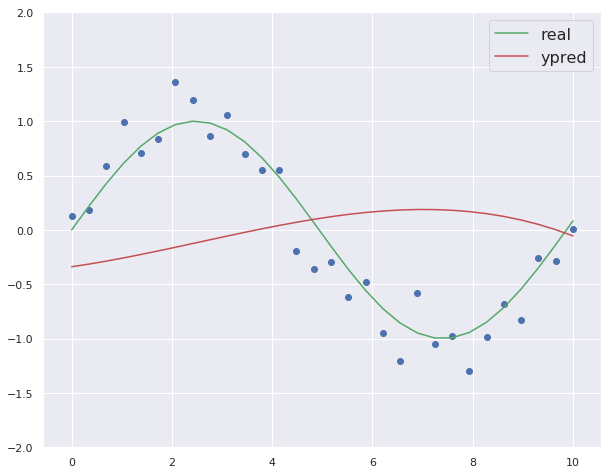

In [28]:
plot_model(Xnorm, x, y, real, w)

Agora vamos calcular o gradiente desse modelo:

In [29]:
def grad(X, y, w):
    ypred = np.dot(X, w)
    erros = ypred - y
    g = np.dot(erros, X) / len(x)
    return g

In [30]:
grad(Xnorm, y, w)

array([0.        , 0.70274454, 0.63093636, 0.53077943])

Vamos tentar atualizar o vetor $\mathbf{\mathsf{w}}$ com o gradiente usando $\eta=0{,}001$.

In [31]:
w = np.array([0.1, 0.2, 0.4, -0.5], dtype=np.float)

In [32]:
eta = 0.1
for i in range(1000):
    w = w - eta*grad(Xnorm, y, w)
w

array([ 0.1       , -0.56798477, -0.94370941,  0.98785975])

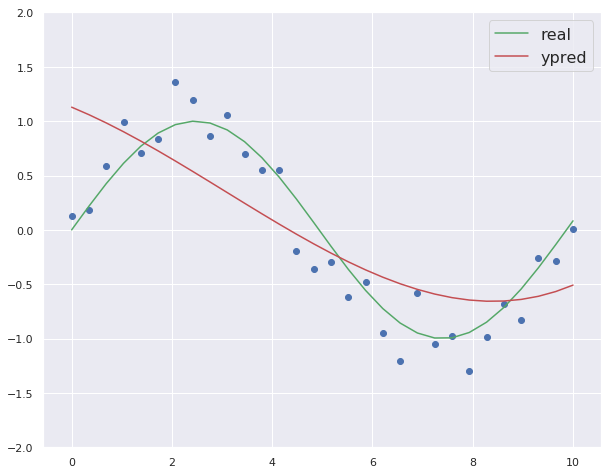

In [33]:
plot_model(Xnorm, x, y, real, w)

Se fizermos ainda mais iterações...

In [34]:
for i in range(100000):
    w = w - eta*grad(Xnorm, y, w)
w

array([  0.1       ,   3.18512866, -10.4241626 ,   6.91372782])

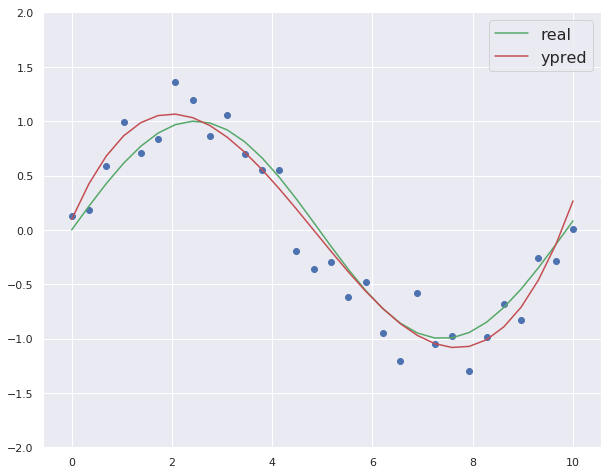

In [35]:
plot_model(Xnorm, x, y, real, w)